In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/iris (1).csv')

In [ ]:
print(data.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [ ]:
features =['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X=data[features]


In [ ]:

X_Scaled = StandardScaler().fit_transform(data[features])

In [ ]:
k_values=range(2,11)
inertial_values=[]

In [ ]:
for k in k_values:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(X_Scaled)
  inertial_values.append(kmeans.inertia_)

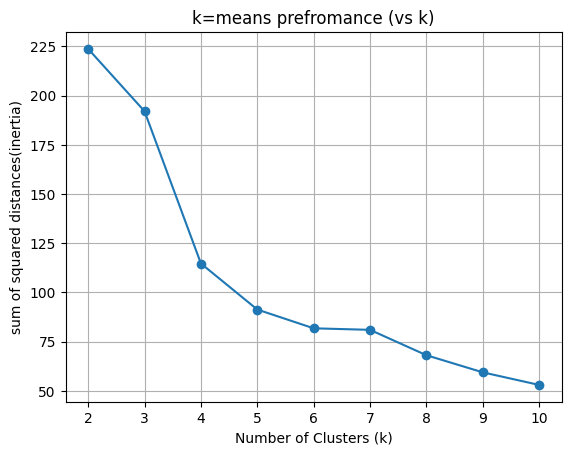

In [ ]:
plt.plot(figsize=(8,6))
plt.plot(k_values,inertial_values,marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('sum of squared distances(inertia)')
plt.title('k=means prefromance (vs k)')
plt.grid()
plt.show()


In [ ]:
k=3
kmeans=KMeans(n_clusters=k,random_state=0)
kmeans.fit(X_Scaled)

KMeans(n_clusters=3, random_state=0)

In [ ]:
labels=kmeans.labels_
centroids=kmeans.cluster_centers_

In [ ]:
inertia=kmeans.inertia_
print(f"Inertia(sum of square.Distances)for K={k}:{inertia}")

Inertia(sum of square.Distances)for K=3:141.2208872836681


In [ ]:

data['cluster']=labels

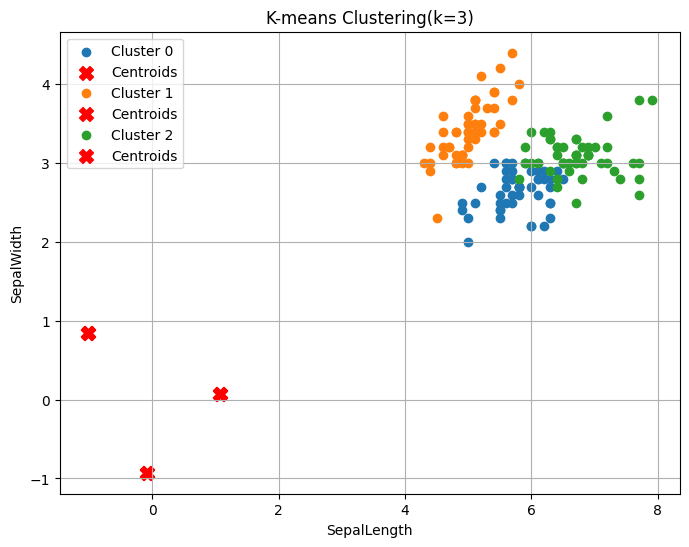

In [ ]:
plt.figure(figsize=(8,6))
for cluster in range(k):
  cluster_data=data[data['cluster']==cluster]
  plt.scatter(cluster_data['SepalLengthCm'],cluster_data['SepalWidthCm'],label=f'Cluster {cluster}')
  plt.scatter(centroids[:,0],centroids[:,1],s=100,c='red',marker='X',label='Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.title('K-means Clustering(k=3)')
plt.legend()
plt.grid()
plt.show()
